# <center> Differential Equations <center>


We consider the differential equation:
$$
\ddot x(t) = -\omega_0^2 x(t)\quad,\quad \omega_0=\sqrt{\frac{K}{M}}
$$
with initial condition $x(0) = x_0$, $v(0)=v_0$.The solution is:
$$
x(t) = Acos(\omega_0 t +\delta)\quad,\quad 
A=\sqrt{\frac{\omega_0^2 x_0^2+v_0^2}{\omega_0^2}}\quad,\quad 
\delta=-\mbox{atan}\left(\frac{v_0}{x_0\omega_0}\right)
$$


In [2]:
x0 = 20.0;

v0 = 10.0;
k=0.3; m=1;
ω0 = sqrt(k/m);
tlim = [0.0 ,50.0];
Δt = 0.01;
f(x) = -ω0^2 * x;

ω0

0.5477225575051661

In [3]:
A = sqrt(((ω0*x0)^2+v0^2)/ω0^2);
δ = -atan(v0/(x0*ω0));
xsol(t) = A*cos(ω0*t + δ);
vsol(t) = -A*ω0* sin(ω0*t+δ); # derivative of xsol(t)

In [4]:
using PyPlot

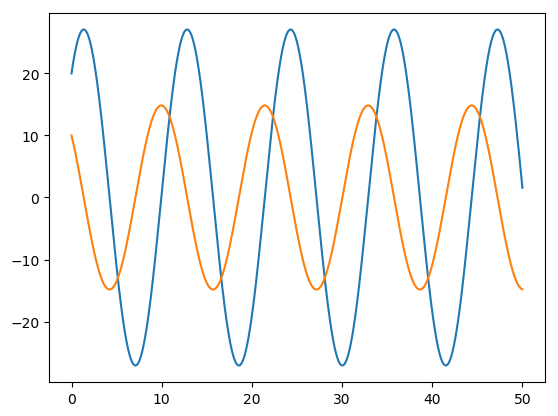

In [5]:
trange = tlim[1]:Δt:tlim[2]
plot(trange,[xsol.(trange) vsol.(trange)]); 
#PER APPLICARE UNA FUNZ A UN VETTORE f.(VETTORE)

Integration methods
----

Euler $
\begin{cases}
v_{n+1} =  v_n + \phi(x_n) \Delta t\\
x_{n+1} = x_n + v_n \Delta t
\end{cases}
$

Euler-Cromer  $
\begin{cases}
v_{n+1} = v_n + \phi(x_n) \Delta t\\
x_{n+1} = x_n + v_{n+1} \Delta t
\end{cases}
$

Midpoint $
\begin{cases}
v_{n+1} = v_n + \phi(x_n) \Delta t\\
x_{n+1} = x_n + \frac{v_{n} + v_{n+1}}2 \Delta t
\end{cases}
$

Leapfrog (Velocity-Verlet) $
\begin{cases}
v_{\frac12} = v_0 + \frac12 \phi(x_0) \Delta t\\
v_{n+\frac12} = v_{n-\frac12} + \phi(x_n) \Delta t\\
x_{n+1} = x_n + v_{n+\frac12} \Delta t
\end{cases}
$

Task:
---

- Implement the four solver algorithms and use it to integrate the harmonic oscillator
- Compute the energy $E_{\Delta t}$ as a function of time and plot
$$ \frac{E_{\Delta t} - E(0)}{E(0)} $$
- Study the dependence of this quantity as a function of $\Delta t$
- Check time reversibility

In [6]:
include("ode_euler.jl");
include("ode_euler-cromer.jl");
include("ode_midpoint.jl");
include("ode_leapfrog.jl");

eule=euler(f,x0,v0,tlim,Δt)
crom=euler_cromer(f,x0,v0,tlim,Δt);
mid=midpoint(f,x0,v0,tlim,Δt);
leap=leapfrog(f,x0,v0,tlim,Δt);

MethodError: MethodError: no method matching euler_cromer(::typeof(f), ::Float64, ::Float64, ::Array{Float64,1}, ::Float64)
Closest candidates are:
  euler_cromer(::Function, !Matched::Array{T,1} where T, !Matched::Array{T,1} where T, ::Array{T,1} where T, ::Number) at /home/salats/Documents/PCS/STOC/LAB4/ode_euler-cromer.jl:3

In [7]:
#plot(eule[1][:] , eule[2][:] );
#plot(crom[1][:] , crom[2][:] );
#plot(mid[1][:] , mid[2][:] );
plot(leap[1][:] , leap[2][:] );

plot(eule[1][:] , xsol.(eule[1]) )

legend(["euler","euler cromer","midpoint","leapfrog","xtrue(t)"]);
xlabel("t");
ylabel("x(t)")
title("x(t)")

UndefVarError: UndefVarError: leap not defined

In [8]:
#DIFFEREZE CON LA SOLUZIONE GIUSTA
plot(eule[1][:] , xsol.(eule[1]) -eule[2][:] );
plot(crom[1][:] , xsol.(mid[1]) -crom[2][:] );
plot(mid[1][:] , xsol.(mid[1]) -mid[2][:] );
plot(leap[1][:] , xsol.(mid[1]) -leap[2][:] );



legend(["euler","euler cromer","midpoint","leapfrog","xtrue(t)"]);
xlabel("t");
ylabel("x(t)")
title("x(t)")

UndefVarError: UndefVarError: crom not defined

In [9]:
E0=0.5*k*x0^2 + 0.5*m*v0^2

E_euler=(0.5*k*eule[2].^2 + 0.5*m*eule[3].^2 .- E0)/E0
E_crom=(0.5*k*crom[2].^2 + 0.5*m*crom[3].^2 .- E0)/E0
E_mid=(0.5*k*mid[2].^2 + 0.5*m*mid[3].^2 .- E0)/E0
E_leap=(0.5*k*leap[2].^2 + 0.5*m*leap[3].^2 .- E0)/E0

#plot(eule[1][:] , E_euler )
plot(crom[1][:] , E_crom )
#plot(mid[1][:] , E_mid )
plot(leap[1][:] , E_leap )

legend(["euler_cromer","leapfrog"]);
xlabel("t");
ylabel("(E-E0)/E0")
title("energies")


UndefVarError: UndefVarError: crom not defined

In [10]:
#AL VARIARE DI Δt
include("ode_euler.jl");

E0=0.5*k*x0^2 + 0.5*m*v0^2
Δt=0.001
while Δt < 0.06
    
    Δt*=2
    eule=euler(f,x0,v0,tlim,Δt)
    E_euler=(0.5*k*eule[2].^2 + 0.5*m*eule[3][].^2 .- E0)/E0
    
end

BoundsError: BoundsError: attempt to access 25001-element Array{Float64,1} at index []

In [11]:
# methods: Euler, EulerCromer, Middlepoint, Leapfrog, 
solver = Leapfrog
res = solve(solver,f,x0,v0,tlim,Δt=Δt,verbose=false);

plot(res.t,[res.x xsol.(res.t) res.v vsol.(res.t)]);
legend(["x(t)","xtrue(t)","v(t)","vtrue(t)"]);
xlabel("t");
ylabel("x(t),v(t)")
title("$solver")

UndefVarError: UndefVarError: Leapfrog not defined

In [12]:
plot(res.t, energy(res,ω0))
legend([L"\Delta E(t)/E(0)"]);
xlabel("t");
ylabel(L"\Delta E(t)/E(0)")
title("$solver")

UndefVarError: UndefVarError: res not defined

In [13]:
resEC = solve(EulerCromer,f,x0,v0,tlim,Δt=Δt,verbose=false);
resLF = solve(Leapfrog,f,x0,v0,tlim,Δt=Δt,verbose=false);
plot(resEC.t,[resEC.x resLF.x])

UndefVarError: UndefVarError: solve not defined

In [14]:
plot(resEC.t,resEC.x-resLF.x)

UndefVarError: UndefVarError: resEC not defined

In [30]:
using LinearAlgebra
r0=[11.0 , 11.0 , 23.2]
vi0=[11.0 , -10.0,13.0 ]
ω0=2
tlim=[0,10]

g(r) = -ω0^2 .*r;

In [31]:
include("cromer_ND.jl")

osc=cromer_ND(g,r0,vi0,tlim,Δt);

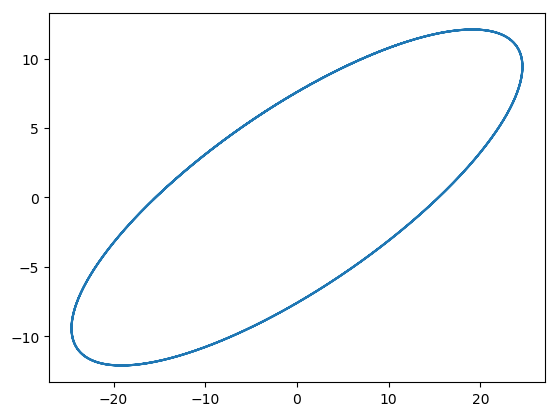

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fac2dcc59d0>

In [34]:
plot(osc.v[:,1],osc.x[:,2])